# Compare retrievals

Compare retrieval across sensors and algorithms.

# SatRain Retrievals across Sensors

In [125]:
%load_ext autoreload
%autoreload 2
    
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import pandas as pd
algs = []
metrics = []
values = []
domains = []

metric_names = {
    "Bias": "bias",
    "MAE": "mae",
    "MSE": "mse",
    "Correlation coef.": "correlation_coef"
}

results_era5 = {
    "conus": xr.load_dataset("results_era5_conus.nc"),
    "austria": xr.load_dataset("results_era5_austria.nc"),
    "korea": xr.load_dataset("results_era5_korea.nc"),
}

name = "ERA5"

for domain, res in results_era5.items():
    for metric, var in metric_names.items():
        algs.append(name)
        metrics.append(metric)
        domains.append(domain)
        values.append(res[var].data.item())

In [127]:
results_gprof_v7 = {
    "conus": xr.load_dataset("gprof_v07a_gmi_conus.nc"),
    "austria": xr.load_dataset("gprof_v07a_gmi_austria.nc"),
    "korea": xr.load_dataset("gprof_v07a_gmi_korea.nc"),
}

name = "GPROF V7 (GMI)"

for domain, res in results_gprof_v7.items():
    for metric, var in metric_names.items():
        algs.append(name)
        metrics.append(metric)
        domains.append(domain)
        values.append(res[var].data.item())

In [128]:
results_geo_ir = {
    "conus": xr.load_dataset("results_geo_ir_conus.nc"),
    "austria": xr.load_dataset("results_geo_ir_austria.nc"),
    "korea": xr.load_dataset("results_geo_ir_korea.nc"),
}

name = "SatRain (Geo-IR)"

for domain, res in results_geo_ir.items():
    for metric, var in metric_names.items():
        algs.append(name)
        metrics.append(metric)
        domains.append(domain)
        values.append(res[var].data.item())

In [129]:
results_geo = {
    "conus": xr.load_dataset("results_geo_conus.nc"),
    "austria": xr.load_dataset("results_geo_austria.nc"),
    "korea": xr.load_dataset("results_geo_korea.nc"),
}

name = "SatRain (Geo)"

for domain, res in results_geo.items():
    for metric, var in metric_names.items():
        algs.append(name)
        metrics.append(metric)
        domains.append(domain)
        values.append(res[var].data.item())

In [130]:
results_gmi = {
    "conus": xr.load_dataset("results_gmi_conus.nc"),
    "austria": xr.load_dataset("results_gmi_austria.nc"),
    "korea": xr.load_dataset("results_gmi_korea.nc"),
}

name = "SatRain (GMI)"

for domain, res in results_gmi.items():
    for metric, var in metric_names.items():
        algs.append(name)
        metrics.append(metric)
        domains.append(domain)
        values.append(res[var].data.item())

In [131]:
results = pd.DataFrame({
    "Algorithm": algs,
    "Metrics": metrics,
    "Values": values,
    "Domains": domains
})

In [132]:
import seaborn as sns
from satrain.plotting import set_style
sns.reset_orig()

set_style()

/tmp/ipykernel_2164246/789639169.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16, 4))
/tmp/ipykernel_2164246/789639169.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["CONUS", "Austria", "Korea"])
/tmp/ipykernel_2164246/789639169.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["CONUS", "Austria", "Korea"])
/tmp/ipykernel_2164246/789639169.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

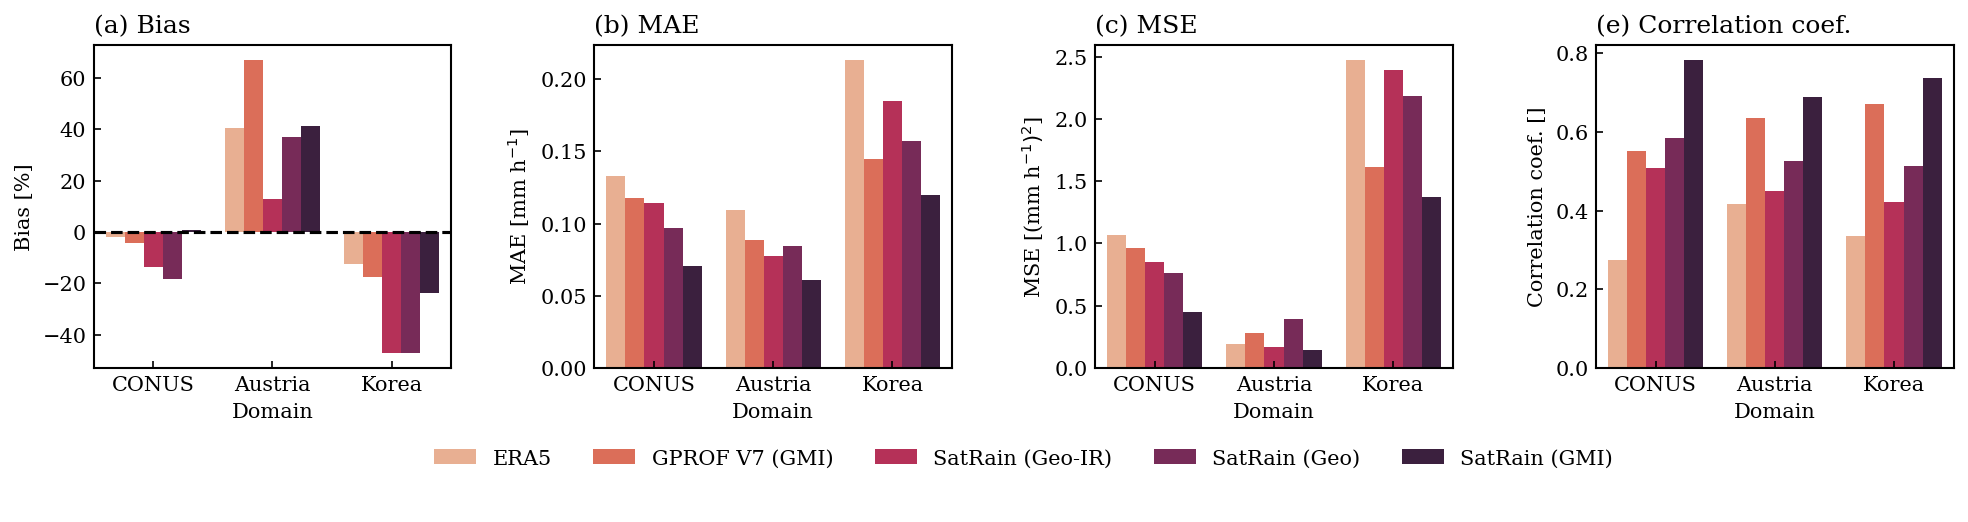

In [133]:
from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 4))
gs = GridSpec(2, 4, height_ratios=[1.0, 0.3], width_ratios=[1.0] * 4, wspace=0.4)

palette = [cmap_precip(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]
palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]

order = ["ERA5", "GPROF V7", "GPROF V8"]
ax = fig.add_subplot(gs[0, 0])
ax.set_title("(a) Bias")
mask = results.Metrics == "Bias"
sns.barplot(results.loc[mask], x="Domains", y="Values", hue="Algorithm", ax=ax, palette=palette)
ax.set_title("(a) Bias")
ax.set_ylabel("Bias [%]")
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()
ax.set_xlabel("Domain")
ax.axhline(ls="--", c="k")
ax.set_xticklabels(["CONUS", "Austria", "Korea"])

ax = fig.add_subplot(gs[0, 1])
mask = results.Metrics == "MAE"
sns.barplot(results.loc[mask], x="Domains", y="Values", hue="Algorithm", ax=ax, legend=False, palette=palette)
ax.set_title("(b) MAE")
ax.set_ylabel("MAE [mm h$^{-1}$]")
ax.set_xlabel("Domain")
ax.set_xticklabels(["CONUS", "Austria", "Korea"])

ax = fig.add_subplot(gs[0, 2])
mask = results.Metrics == "MSE"
sns.barplot(results.loc[mask], x="Domains", y="Values", hue="Algorithm", ax=ax, legend=False, palette=palette)
ax.set_title("(c) MSE")
ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
ax.set_xlabel("Domain")
ax.set_xticklabels(["CONUS", "Austria", "Korea"])

ax = fig.add_subplot(gs[0, 3])
mask = results.Metrics == "Correlation coef."
sns.barplot(results.loc[mask], x="Domains", y="Values", hue="Algorithm", ax=ax, legend=False, palette=palette)
ax.set_title("(e) Correlation coef.")
ax.set_ylabel("Correlation coef. []")
ax.set_xlabel("Domain")
ax.set_xticklabels(["CONUS", "Austria", "Korea"])

lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("../figures/fig10.png", bbox_inches="tight", dpi=200)
fig

### Precipitation estimation

In [154]:
metrics = ["bias", "mae", "mse", "correlation_coef"]
results_rf_gmi = xr.load_dataset("/home/simon/data/ipwgml_models/gmi/random_forest/results.nc")[metrics].to_dataframe()
results_rf_gmi["algorithm"] = "Random Forest"

results_xgboost_gmi = xr.load_dataset("/home/simon/data/ipwgml_models/gmi/xgboost/results.nc")[metrics].to_dataframe()
results_xgboost_gmi["algorithm"] = "XGBoost"

results_mlp_gmi = xr.load_dataset("/home/simon/data/ipwgml_models/gmi/mlp/results.nc")[metrics].to_dataframe()
results_mlp_gmi["algorithm"] = "MLP"

In [159]:
metrics = ["bias", "mae", "mse", "correlation_coef"]
results_rf_atms = xr.load_dataset("/home/simon/data/ipwgml_models/atms/random_forest/results.nc")[metrics].to_dataframe()
results_rf_atms["algorithm"] = "Random Forest"

results_xgboost_atms = xr.load_dataset("/home/simon/data/ipwgml_models/atms/xgboost/results.nc")[metrics].to_dataframe()
results_xgboost_atms["algorithm"] = "XGBoost"

results_mlp_atms = xr.load_dataset("/home/simon/data/ipwgml_models/atms/mlp_xl/results_1.nc")[metrics].to_dataframe()
results_mlp_atms["algorithm"] = "MLP"

In [160]:
results_cnn_gmi = []
domains = ["austria", "korea", "conus"]
for domain in domains:
    res = xr.load_dataset(f"results_gmi_{domain}.nc")
    res["domain"] = domain
    results_cnn_gmi.append(res)
results_cnn_gmi = xr.concat(results_cnn_gmi, dim="domain")
results_cnn_gmi = results_cnn_gmi[["bias", "mae", "mse", "correlation_coef"]].to_dataframe()
results_cnn_gmi["algorithm"] = "CNN"

/home/simon/miniforge3/envs/satrain/lib/python3.13/site-packages/xarray/structure/concat.py:637: UserWarning: No index created for dimension domain because variable domain is not a coordinate. To create an index for domain, please first call `.set_coords('domain')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [161]:
results_cnn_atms = []
domains = ["austria", "korea", "conus"]
for domain in domains:
    res = xr.load_dataset(f"results_atms_{domain}.nc")
    res["domain"] = domain
    results_cnn_atms.append(res)
results_cnn_atms = xr.concat(results_cnn_atms, dim="domain")
results_cnn_atms = results_cnn_atms[["bias", "mae", "mse", "correlation_coef"]].to_dataframe()
results_cnn_atms["algorithm"] = "CNN"

/home/simon/miniforge3/envs/satrain/lib/python3.13/site-packages/xarray/structure/concat.py:637: UserWarning: No index created for dimension domain because variable domain is not a coordinate. To create an index for domain, please first call `.set_coords('domain')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [162]:
results_gmi = pd.concat([results_rf_gmi, results_xgboost_gmi, results_mlp_gmi, results_cnn_gmi]).reset_index()
results_gmi = pd.melt(
    results_gmi,
    id_vars=['domain', 'algorithm'],
    var_name='Metrics',
    value_name='Values'
)

results_atms = pd.concat([results_rf_atms, results_xgboost_atms, results_mlp_atms, results_cnn_atms]).reset_index()
results_atms = pd.melt(
    results_atms,
    id_vars=['domain', 'algorithm'],
    var_name='Metrics',
    value_name='Values'
)

/tmp/ipykernel_2164246/2845769939.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:36: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:48: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:60: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, pale

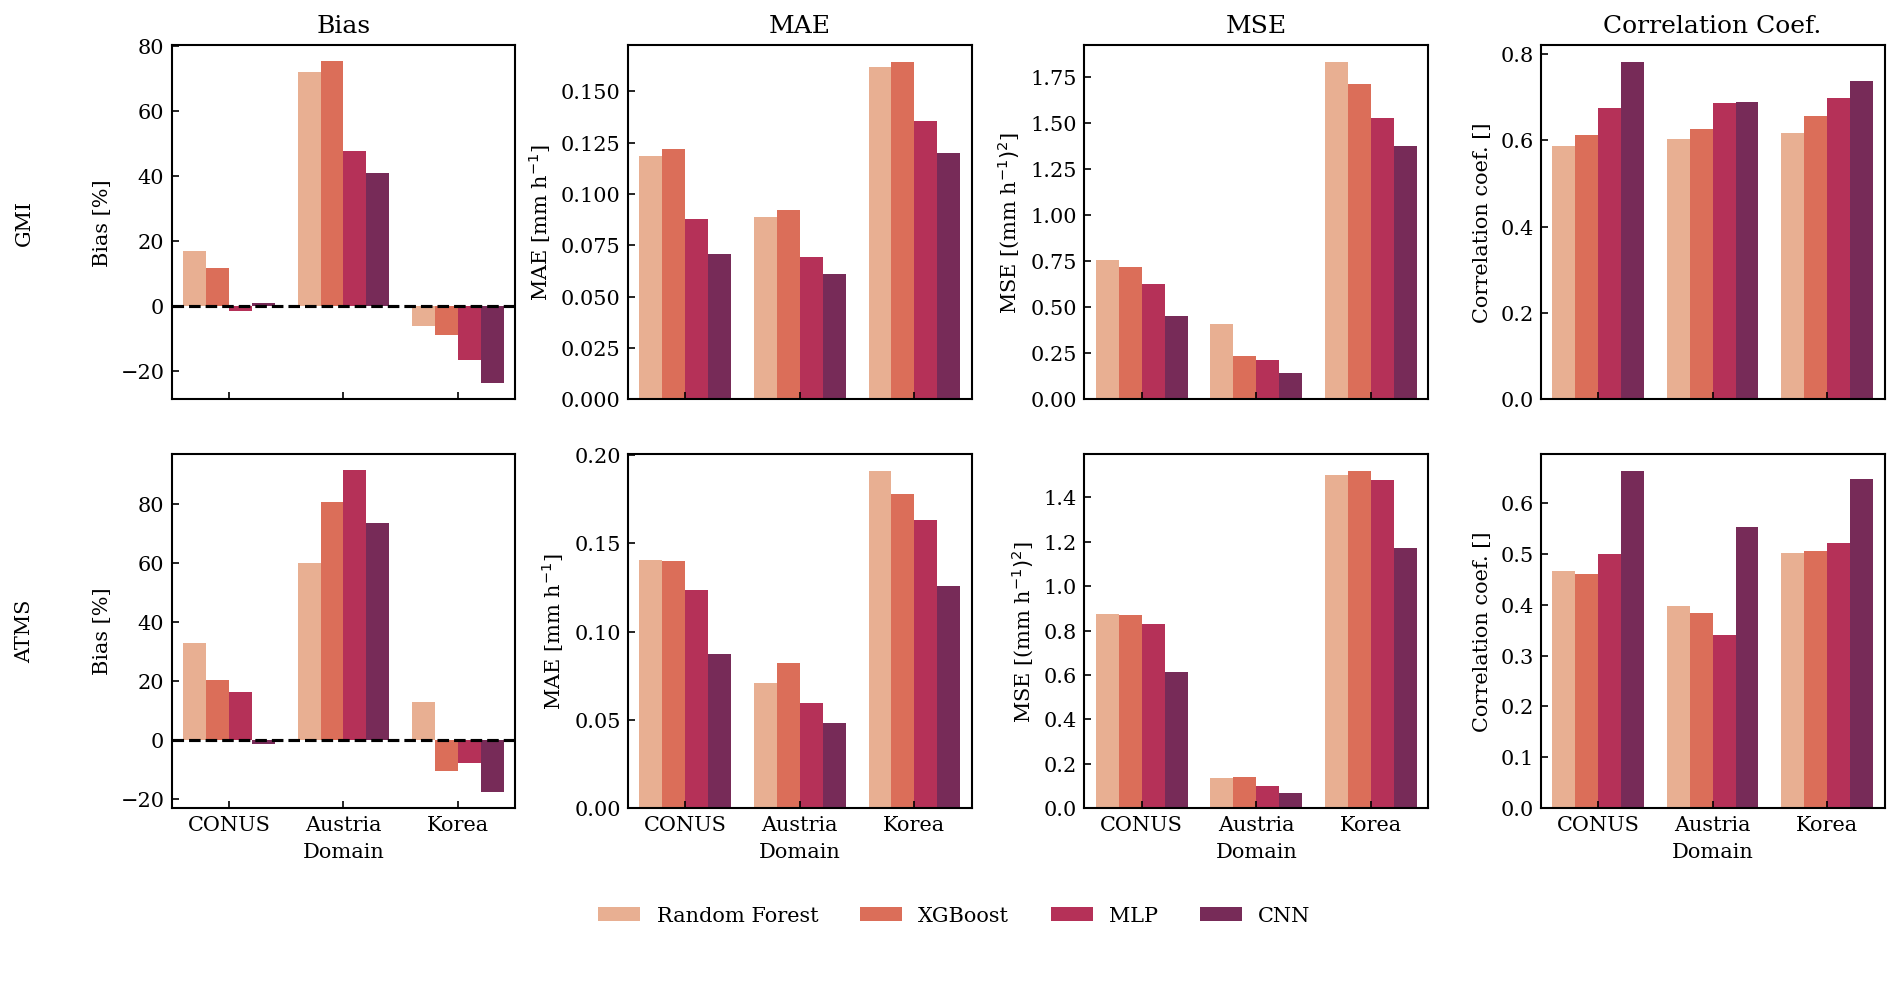

In [163]:
from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 5, height_ratios=[1.0, 1.0, 0.3], width_ratios= [0.1] + [1.0] * 4, wspace=0.4)

palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
#3palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]

order = ["conus", "austria", "korea"]

for row, (name, results) in enumerate(zip(["GMI", "ATMS"], [results_gmi, results_atms])):
    
    ax = fig.add_subplot(gs[row, 0])
    ax.set_axis_off()
    ax.text(0, 0, name, rotation=90, ha="center", va="center")
    ax.set_ylim(-2, 2)
    
    ax = fig.add_subplot(gs[row, 1])
    mask = results.Metrics == "bias"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
    if row == 0:
        ax.set_title("Bias", loc="center")
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("Bias [%]")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.axhline(ls="--", c="k")
    
    ax = fig.add_subplot(gs[row, 2])
    mask = results.Metrics == "mae"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MAE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("MAE [mm h$^{-1}$]")
    
    ax = fig.add_subplot(gs[row, 3])
    mask = results.Metrics == "mse"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MSE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
    
    ax = fig.add_subplot(gs[row, 4])
    mask = results.Metrics == "correlation_coef"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("Correlation Coef.", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("Correlation coef. []")
    
lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("../figures/fig11.png", dpi=200, bbox_inches="tight")
fig

/tmp/ipykernel_2164246/2212698959.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
/tmp/ipykernel_2164246/2212698959.py:36: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2212698959.py:48: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2212698959.py:60: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, pale

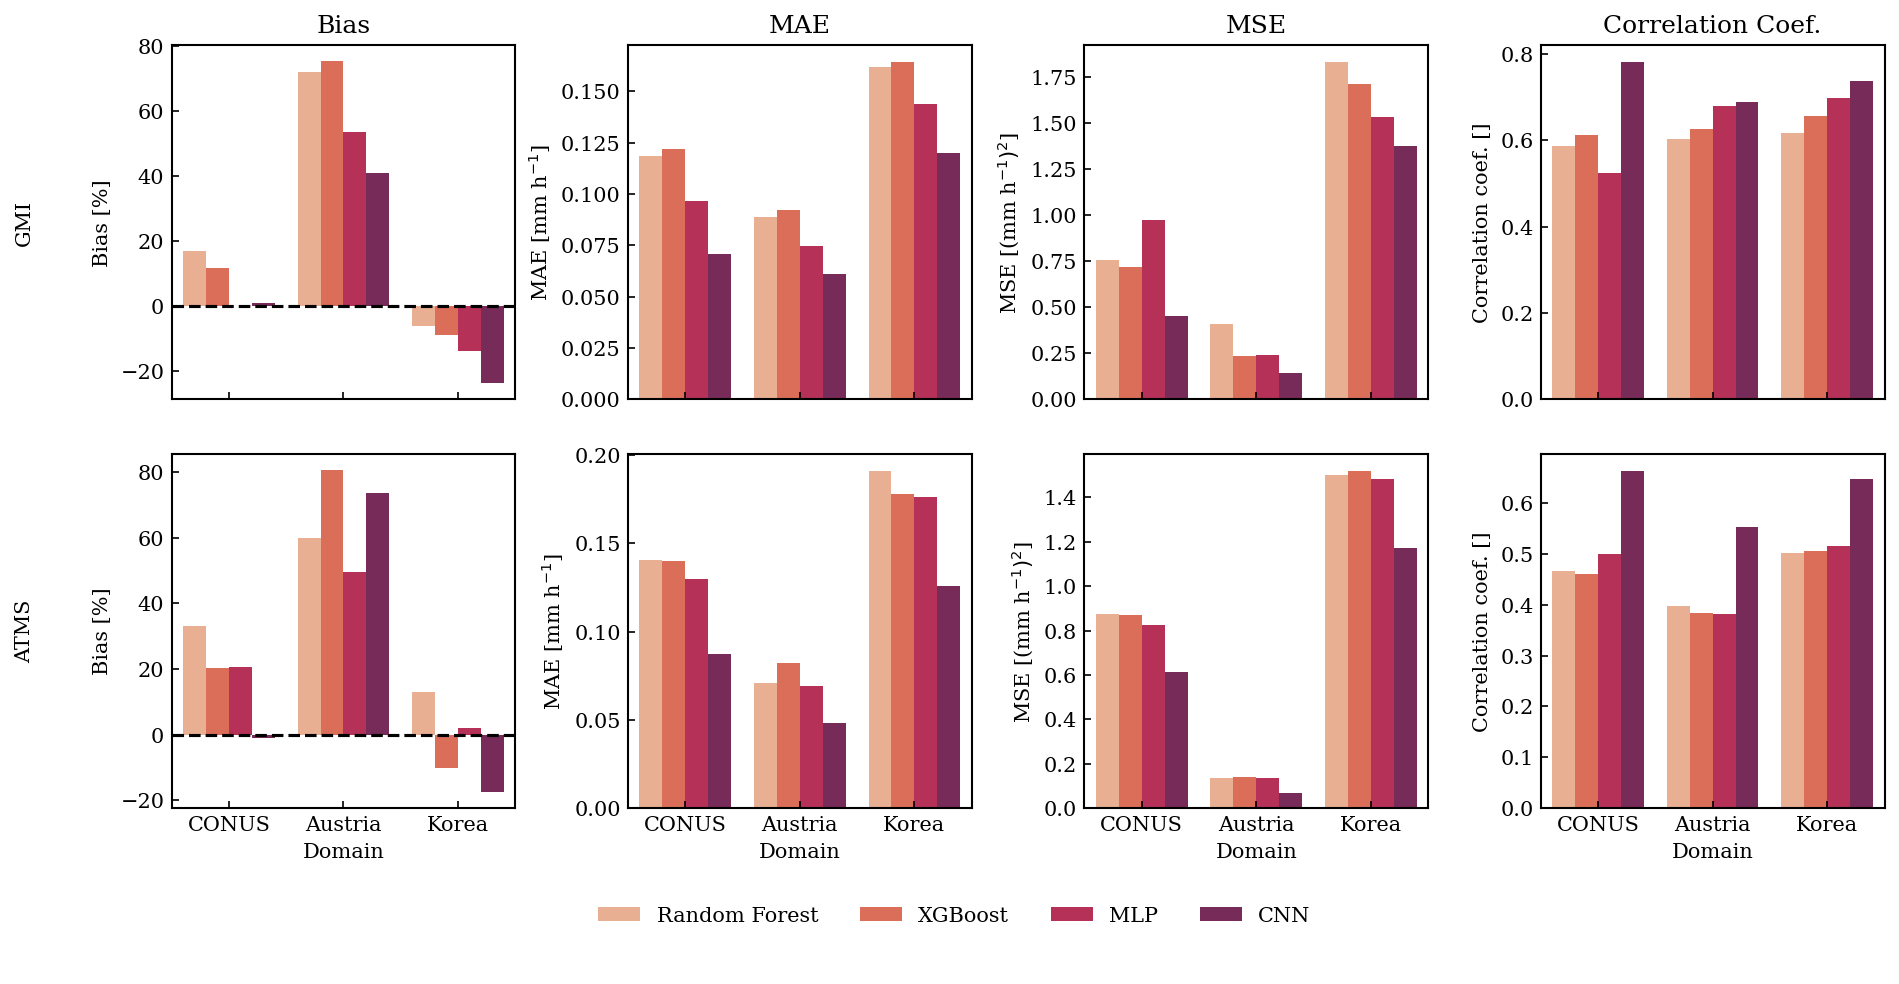

In [106]:

from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 5, height_ratios=[1.0, 1.0, 0.3], width_ratios= [0.1] + [1.0] * 4, wspace=0.4)

palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
#3palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]

order = ["conus", "austria", "korea"]

for row, (name, results) in enumerate(zip(["GMI", "ATMS"], [results_gmi, results_atms])):
    
    ax = fig.add_subplot(gs[row, 0])
    ax.set_axis_off()
    ax.text(0, 0, name, rotation=90, ha="center", va="center")
    ax.set_ylim(-2, 2)
    
    ax = fig.add_subplot(gs[row, 1])
    mask = results.Metrics == "bias"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
    if row == 0:
        ax.set_title("Bias", loc="center")
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("Bias [%]")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.axhline(ls="--", c="k")
    
    ax = fig.add_subplot(gs[row, 2])
    mask = results.Metrics == "mae"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MAE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("MAE [mm h$^{-1}$]")
    
    ax = fig.add_subplot(gs[row, 3])
    mask = results.Metrics == "mse"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MSE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
    
    ax = fig.add_subplot(gs[row, 4])
    mask = results.Metrics == "correlation_coef"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("Correlation Coef.", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("Correlation coef. []")
    
lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("../figures/fig11.png", dpi=200, bbox_inches="tight")
fig

/tmp/ipykernel_2164246/2845769939.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:36: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:48: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:60: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, pale

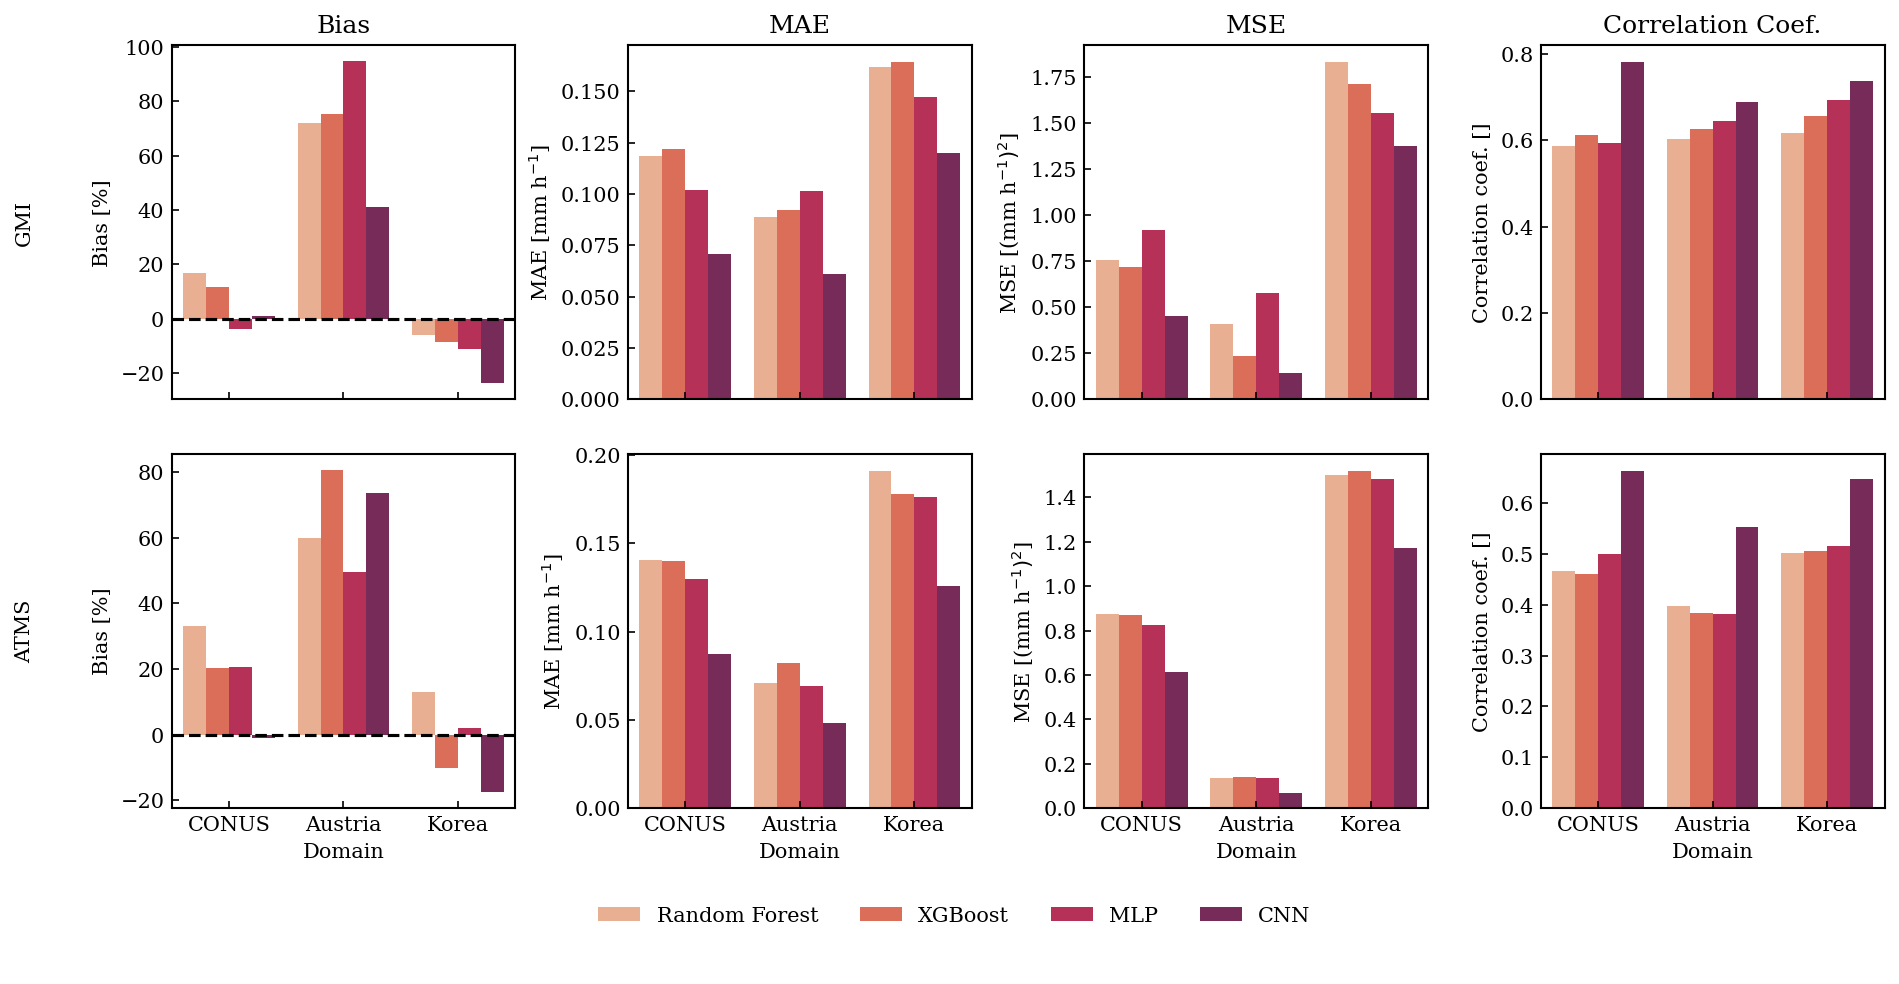

In [88]:
from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 5, height_ratios=[1.0, 1.0, 0.3], width_ratios= [0.1] + [1.0] * 4, wspace=0.4)

palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
#3palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]

order = ["conus", "austria", "korea"]

for row, (name, results) in enumerate(zip(["GMI", "ATMS"], [results_gmi, results_atms])):
    
    ax = fig.add_subplot(gs[row, 0])
    ax.set_axis_off()
    ax.text(0, 0, name, rotation=90, ha="center", va="center")
    ax.set_ylim(-2, 2)
    
    ax = fig.add_subplot(gs[row, 1])
    mask = results.Metrics == "bias"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
    if row == 0:
        ax.set_title("Bias", loc="center")
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("Bias [%]")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.axhline(ls="--", c="k")
    
    ax = fig.add_subplot(gs[row, 2])
    mask = results.Metrics == "mae"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MAE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("MAE [mm h$^{-1}$]")
    
    ax = fig.add_subplot(gs[row, 3])
    mask = results.Metrics == "mse"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MSE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
    
    ax = fig.add_subplot(gs[row, 4])
    mask = results.Metrics == "correlation_coef"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("Correlation Coef.", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("Correlation coef. []")
    
lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("../figures/fig11.png", dpi=200, bbox_inches="tight")
fig

/tmp/ipykernel_2164246/2845769939.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:36: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:48: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_2164246/2845769939.py:60: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, pale

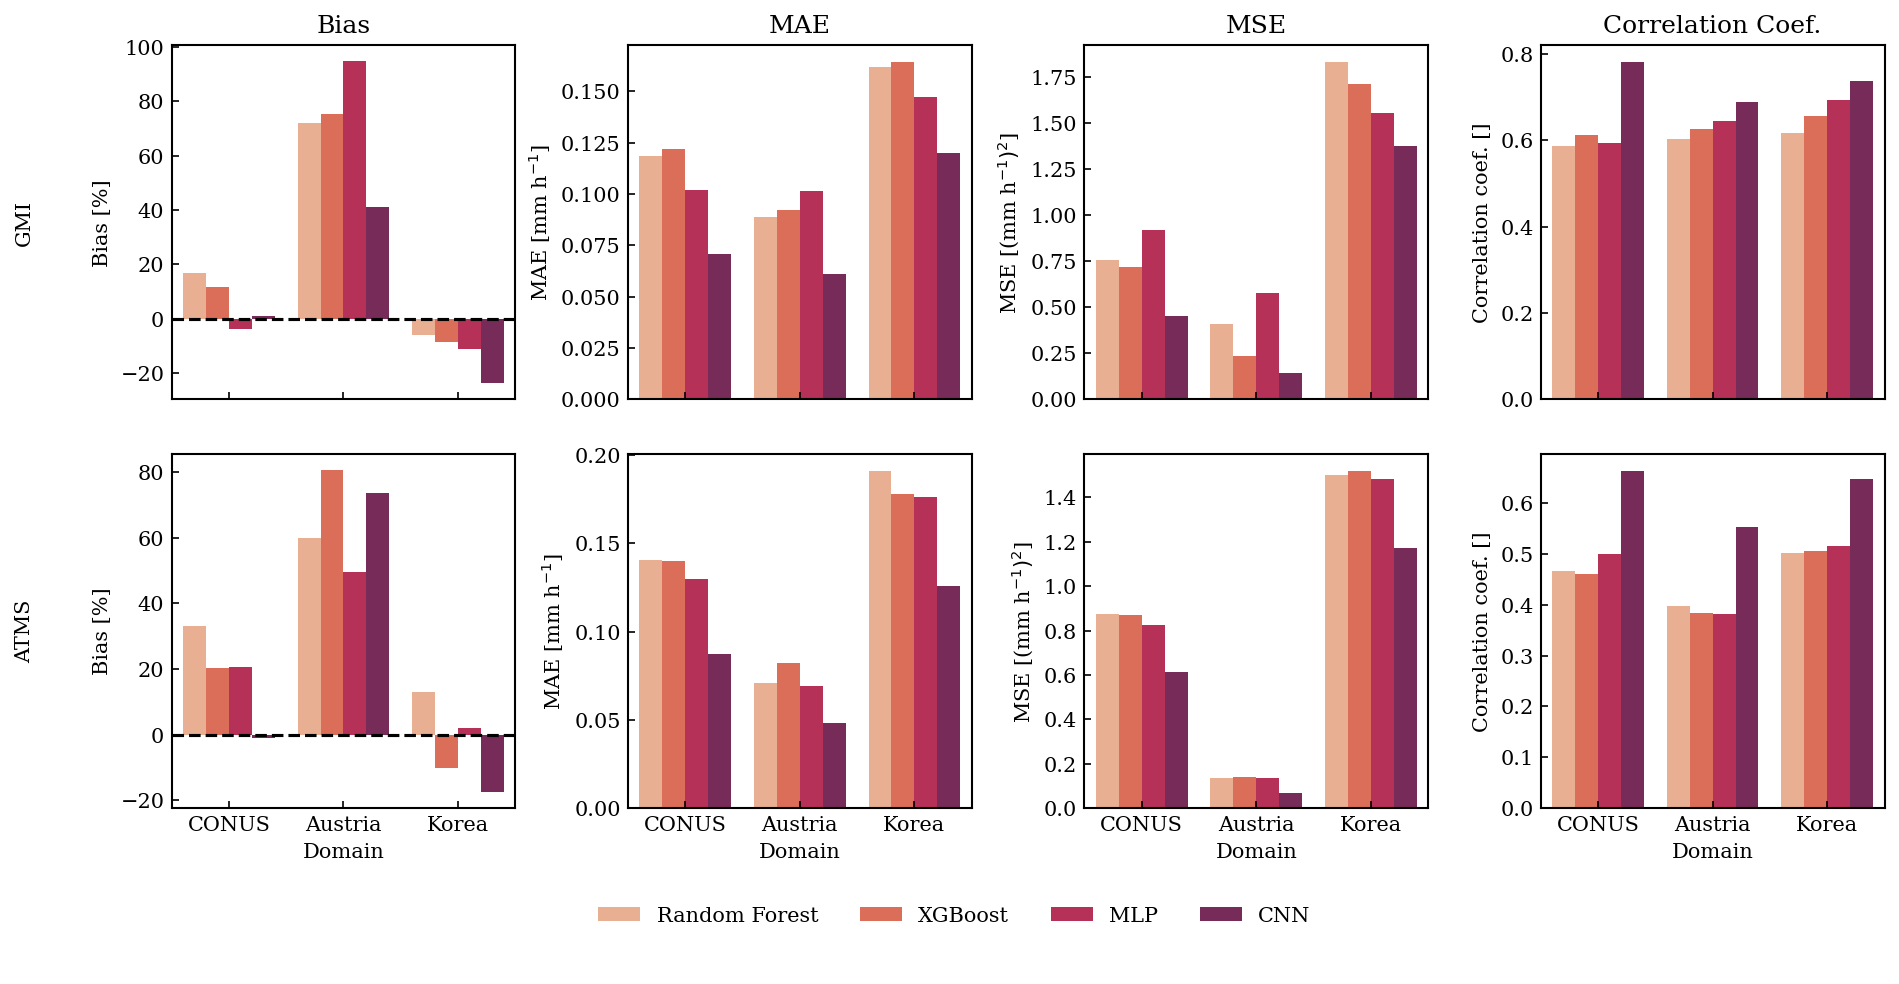

In [89]:
from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 5, height_ratios=[1.0, 1.0, 0.3], width_ratios= [0.1] + [1.0] * 4, wspace=0.4)

palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
#3palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]

order = ["conus", "austria", "korea"]

for row, (name, results) in enumerate(zip(["GMI", "ATMS"], [results_gmi, results_atms])):
    
    ax = fig.add_subplot(gs[row, 0])
    ax.set_axis_off()
    ax.text(0, 0, name, rotation=90, ha="center", va="center")
    ax.set_ylim(-2, 2)
    
    ax = fig.add_subplot(gs[row, 1])
    mask = results.Metrics == "bias"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
    if row == 0:
        ax.set_title("Bias", loc="center")
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("Bias [%]")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.axhline(ls="--", c="k")
    
    ax = fig.add_subplot(gs[row, 2])
    mask = results.Metrics == "mae"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MAE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("MAE [mm h$^{-1}$]")
    
    ax = fig.add_subplot(gs[row, 3])
    mask = results.Metrics == "mse"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MSE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
    
    ax = fig.add_subplot(gs[row, 4])
    mask = results.Metrics == "correlation_coef"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("Correlation Coef.", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("Correlation coef. []")
    
lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("../figures/fig11.png", dpi=200, bbox_inches="tight")
fig

/tmp/ipykernel_748760/3146934734.py:16: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
/tmp/ipykernel_748760/3146934734.py:31: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_748760/3146934734.py:43: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
/tmp/ipykernel_748760/3146934734.py:55: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=

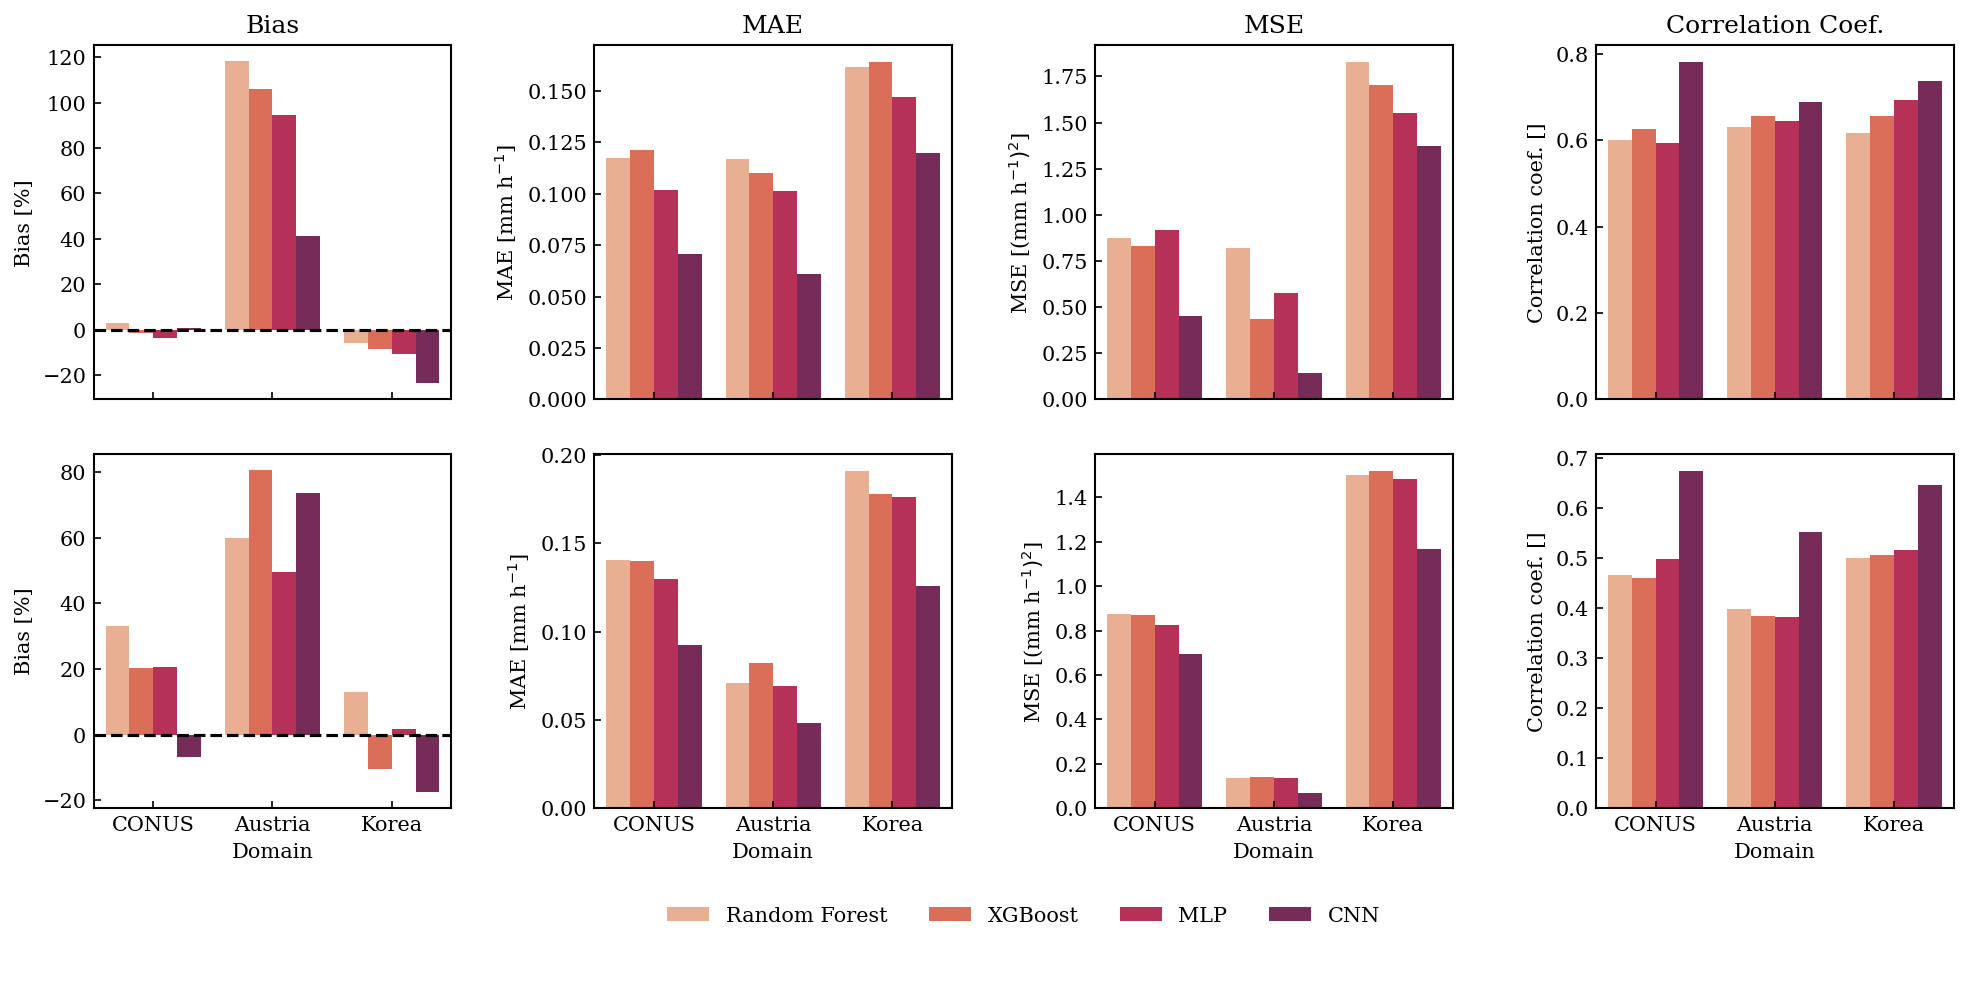

In [70]:

from matplotlib.gridspec import GridSpec
from satrain.plotting import cmap_precip, cmap_tbs

fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 4, height_ratios=[1.0, 1.0, 0.3], width_ratios=[1.0] * 4, wspace=0.4)

palette = [cmap_tbs(val) for val in np.linspace(0, 1, 7)[1:-1]][::-1]
#3palette = ["#888888", "#AAAAAA", "C1", "C2", "C3"]

order = ["conus", "austria", "korea"]

for row, (name, results) in enumerate(zip(["GMI", "ATMS"], [results_gmi, results_atms])):
    
    ax = fig.add_subplot(gs[row, 0])
    mask = results.Metrics == "bias"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, palette=palette, order=order)
    if row == 0:
        ax.set_title("Bias", loc="center")
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("Bias [%]")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend_.remove()
    ax.axhline(ls="--", c="k")
    
    ax = fig.add_subplot(gs[row, 1])
    mask = results.Metrics == "mae"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MAE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
        ax.set_xlabel("Domain")
    ax.set_ylabel("MAE [mm h$^{-1}$]")
    
    ax = fig.add_subplot(gs[row, 2])
    mask = results.Metrics == "mse"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("MSE", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("MSE [(mm h$^{-1})^2$]")
    
    ax = fig.add_subplot(gs[row, 3])
    mask = results.Metrics == "correlation_coef"
    sns.barplot(results.loc[mask], x="domain", y="Values", hue="algorithm", ax=ax, legend=False, palette=palette, order=order)
    if row == 0:
        ax.set_title("Correlation Coef.", loc="center")
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Domain")
        ax.set_xticklabels(["CONUS", "Austria", "Korea"])
    ax.set_ylabel("Correlation coef. []")
    
lax = fig.add_subplot(gs[-1, :] )
lax.set_axis_off()
lax.legend(handles, labels, loc="center", ncol=5, frameon=False)
fig.savefig("model_comparison.png", dpi=200, bbox_inches="tight")

In [70]:
from pytorch_retrieve import load_model
mdl = load_model("/home/simon/src/ipwgml/models/satrain/gmi/ipwgml_gmi.pt")
mdl_2 = load_model("/home/simon/src/ipwgml/models/satrain/gmi/ipwgml_geo.pt")

In [82]:
mdl.heads["surface_precip"][0][0].body[0].weight - mdl_2.heads["surface_precip"][0][0].body[0].weight

tensor([[[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        ...,


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]],


        [[[0.]],

         [[0.]],

         [[0.]],

         ...,

         [[0.]],

         [[0.]],

         [[0.]]]], grad_fn=<SubBackward0>)